In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, 0.001)
model.add_layer(DenseLayer(1, 8, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(3, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
# optimizer
ga = GA(
    dict(
        m = 200,
        x_rate = [0.3, 0.5],
        m_rate = [0.2, 0.6],
        weight_constraint = [-3.,3.],
        radioactive_rating = [0.1, 0.5],
        grow_factor = [0.1, 0.5]))

In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'essential_metrics','categorical_crossentropy'])

building layer 1 with 5
48
building layer 2 with 8
36
building layer 3 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 2
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 300
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)


In [8]:
# learning phase
history = model.fit(x_train, y_train, EPOCHS)

date global 0.6709294541973934
update global 0.6699572411653038
came in: 312
to refresh 2
Iteration 152/300: 	0.6699572411653038
update global 0.6699572411653038
came in: 318
to refresh 0
Iteration 153/300: 	0.6699572411653038
update global 0.6699572411653038
update global 0.6698211955132886
update global 0.6695848981910777
came in: 321
to refresh 0
Iteration 154/300: 	0.6695848981910777
update global 0.6695848981910777
came in: 324
to refresh 1
Iteration 155/300: 	0.6695848981910777
update global 0.6695848981910777
update global 0.6695093885760441
update global 0.6694217574930637
came in: 315
to refresh 0
Iteration 156/300: 	0.6694217574930637
update global 0.6694217574930637
update global 0.6691544434734594
update global 0.6691248528311186
came in: 321
to refresh 0
Iteration 157/300: 	0.6691248528311186
update global 0.6691248528311186
update global 0.6687993557653694
came in: 319
to refresh 0
Iteration 158/300: 	0.6687993557653694
update global 0.6687993557653694
update global 0.668

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for y in y_list:
        ax.plot(x, y)
    if x_label is not None and y_label is not None and title is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title=title)
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()



In [10]:
print(history)

[0.729560709445276, 0.729560709445276, 0.729560709445276, 0.729560709445276, 0.729560709445276, 0.729560709445276, 0.729560709445276, 0.729560709445276, 0.7219304592809944, 0.7219304592809944, 0.7219304592809944, 0.7219304592809944, 0.7219304592809944, 0.7219304592809944, 0.7219304592809944, 0.7219304592809944, 0.7218027560510368, 0.721027124707944, 0.7204840829439252, 0.7204840829439252, 0.7204840829439252, 0.7204840829439252, 0.7177242386006863, 0.7177242386006863, 0.7177242386006863, 0.7177242386006863, 0.7177242386006863, 0.7177242386006863, 0.7172997020115363, 0.7172997020115363, 0.7172703965802059, 0.7172703965802059, 0.7172703965802059, 0.7154495381863317, 0.7153639748831776, 0.7153639748831776, 0.7153639748831776, 0.708295733015114, 0.708295733015114, 0.708295733015114, 0.708295733015114, 0.708295733015114, 0.708295733015114, 0.708295733015114, 0.708295733015114, 0.708295733015114, 0.708295733015114, 0.7082217920606382, 0.7082217920606382, 0.7082217920606382, 0.7082217920606382

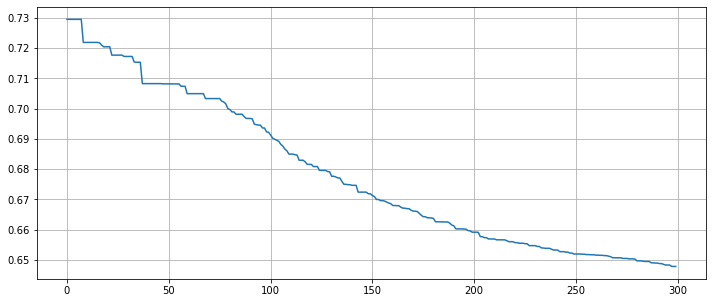

In [11]:
draw_plot(x = [i for i in range(len(history))], y_list = [history], x_label = 'Epochs', \
    y_label = model.loss_fn)

In [16]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[0. 0. 1.] <-> [[0.01207592]
 [0.4227994 ]
 [0.56512463]]
[1. 0. 0.] <-> [[0.9046432 ]
 [0.06452435]
 [0.03083238]]
[0. 1. 0.] <-> [[0.90114486]
 [0.06662   ]
 [0.03223518]]
[1. 0. 0.] <-> [[0.4498946 ]
 [0.3045201 ]
 [0.24558531]]
[1. 0. 0.] <-> [[0.90009433]
 [0.06736588]
 [0.03253982]]
[1. 0. 0.] <-> [[0.50414217]
 [0.27803218]
 [0.21782567]]
[0. 0. 1.] <-> [[0.00913108]
 [0.41261762]
 [0.57825136]]
[1. 0. 0.] <-> [[0.8957924 ]
 [0.07004385]
 [0.03416377]]
[1. 0. 0.] <-> [[0.8937773 ]
 [0.07129731]
 [0.03492529]]
[1. 0. 0.] <-> [[0.90009737]
 [0.06736396]
 [0.03253866]]
[1. 0. 0.] <-> [[0.5099619 ]
 [0.2752995 ]
 [0.21473856]]
[1. 0. 0.] <-> [[0.4867139]
 [0.2863417]
 [0.2269445]]
[1. 0. 0.] <-> [[0.91477215]
 [0.05814477]
 [0.02708303]]
[1. 0. 0.] <-> [[0.8932165 ]
 [0.07165043]
 [0.03513308]]
[1. 0. 0.] <-> [[0.50703835]
 [0.27667108]
 [0.21629061]]
[1. 0. 0.] <-> [[0.9140222 ]
 [0.05860425]
 [0.02737354]]
[0. 1. 0.] <-> [[0.06759349]
 [0.45645845]
 [0.4759481 ]]
[1. 0. 0.] <-> [[